RANDOM FOREST

In [13]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
iris_df = pd.read_csv('Iris_data_sample.csv',header =None)
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       151 non-null    object 
 2   2       150 non-null    object 
 3   3       150 non-null    object 
 4   4       151 non-null    object 
 5   5       150 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.2+ KB


In [14]:
iris_df

,0,1,2,3,4,5
0,NaN,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,1.0,5.1,3.5,1.4,0.2,Iris-setosa
2,2.0,4.9,NaN,1.4,0.2,NaN
3,3.0,4.7,3.2,1.3,0.2,Iris-setosa
4,4.0,??,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...,...
146,146.0,6.7,3,5.2,2.3,Iris-virginica
147,147.0,6.3,2.5,5,1.9,Iris-virginica
148,148.0,6.5,3,5.2,2,Iris-virginica
149,149.0,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
iris_df = iris_df.replace(to_replace =['??', '###'],value =None) 

In [16]:
iris_df.dropna(axis = 0, how='any',inplace = True)

In [17]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 1 to 150
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       148 non-null    float64
 1   1       148 non-null    object 
 2   2       148 non-null    object 
 3   3       148 non-null    object 
 4   4       148 non-null    object 
 5   5       148 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.2+ KB


In [18]:
iris_df.iloc[:,5].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        48
Name: 5, dtype: int64

In [19]:
X_features = iris_df.iloc[:,1:5]
X_features

,1,2,3,4
1,5.1,3.5,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.7,3.1,1.5,0.2
5,5,3.6,1.5,0.2
7,4.6,3.4,1.4,0.3
...,...,...,...,...
146,6.7,3,5.2,2.3
147,6.3,2.5,5,1.9
148,6.5,3,5.2,2
149,6.2,3.4,5.4,2.3


In [20]:
Y_features = iris_df.iloc[:,5]
Y_features

1         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
7         Iris-setosa
            ...      
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
150    Iris-virginica
Name: 5, Length: 148, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_features, Y_features,test_size = 0.25,random_state = 42 )

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=15,n_estimators=20,max_features = 'auto')

In [23]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=20)

In [24]:
y_pred=clf.predict(X_test)

In [25]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8918918918918919


In [27]:
def draw_cm( actual, predicted ):
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted)
    sn.heatmap(cm, annot=True, fmt='.2f' )
    #plt.ylabel('True label')
    #plt.xlabel('Predicted label')
    plt.show()

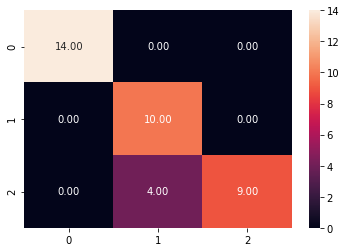

In [28]:

draw_cm( y_test, y_pred )

In [29]:
print( metrics.classification_report( y_test, y_pred ) )

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.71      1.00      0.83        10
 Iris-virginica       1.00      0.69      0.82        13

       accuracy                           0.89        37
      macro avg       0.90      0.90      0.88        37
   weighted avg       0.92      0.89      0.89        37

